In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import math

from neo4j import GraphDatabase

fileName = "c35_measurements.csv"
railRef = '765R'

df = pd.read_csv(fileName)


df.drop(df[(df['rail']=='1292L') | (df['rail']=='1292R')].index,axis=0, inplace=True)

                 
df.head(10)

,msn,work_order,point_id,rail,dx_value (mm),dy_value (mm),dz_value (mm)
2,11402,1016408792,FR035_MR0254L_RJ_0001_NFF,254L,0.21,0.59,-0.43
3,11402,1016408792,FR035_MR0254R_RJ_0001_NFF,254R,-0.73,-0.61,-0.65
4,11402,1016408792,FR035_MR0765L_SJ_0007_NFF,765L,-0.16,1.18,0.71
5,11402,1016408792,FR035_MR0765R_SJ_0007_NFF,765R,-0.38,0.44,0.54
8,11451,1016681539,FR035_MR0254L_RJ_0001_NFF,254L,0.51,1.42,0.62
9,11451,1016681539,FR035_MR0254R_RJ_0001_NFF,254R,0.16,-0.41,0.11
10,11451,1016681539,FR035_MR0765L_SJ_0007_NFF,765L,-0.03,1.98,1.30
11,11451,1016681539,FR035_MR0765R_SJ_0007_NFF,765R,0.21,-1.04,0.06
14,11471,1016544322,FR035_MR0254L_RJ_0001_NFF,254L,0.67,1.77,-1.23
15,11471,1016544322,FR035_MR0254R_RJ_0001_NFF,254R,0.08,0.50,-1.44


In [21]:

dfRef = df.loc[df[(df['rail']==railRef)].index, ['msn', 'dx_value (mm)', 'dy_value (mm)', 'dz_value (mm)']]

def ReferToX(row):
    result = 0
    for i in dfRef.index:
        if dfRef['msn'][i] == row['msn']: 
            return row['dx_value (mm)'] - dfRef['dx_value (mm)'][i]

def ReferToY(row):
    result = 0
    for i in dfRef.index:
        if dfRef['msn'][i] == row['msn']: 
            return row['dy_value (mm)'] - dfRef['dy_value (mm)'][i]
                
def ReferToZ(row):
    result = 0
    for i in dfRef.index:
        if dfRef['msn'][i] == row['msn']: 
            return row['dz_value (mm)'] - dfRef['dz_value (mm)'][i]     
                
df['dx_relative (mm)'] = df.apply(ReferToX, axis=1)
df['dy_relative (mm)'] = df.apply(ReferToY, axis=1)
df['dz_relative (mm)'] = df.apply(ReferToZ, axis=1)

df.head(10)



,msn,work_order,point_id,rail,dx_value (mm),dy_value (mm),dz_value (mm),dx_relative (mm),dy_relative (mm),dz_relative (mm)
2,11402,1016408792,FR035_MR0254L_RJ_0001_NFF,254L,0.21,0.59,-0.43,0.59,0.15,-0.97
3,11402,1016408792,FR035_MR0254R_RJ_0001_NFF,254R,-0.73,-0.61,-0.65,-0.35,-1.05,-1.19
4,11402,1016408792,FR035_MR0765L_SJ_0007_NFF,765L,-0.16,1.18,0.71,0.22,0.74,0.17
5,11402,1016408792,FR035_MR0765R_SJ_0007_NFF,765R,-0.38,0.44,0.54,0.00,0.00,0.00
8,11451,1016681539,FR035_MR0254L_RJ_0001_NFF,254L,0.51,1.42,0.62,0.30,2.46,0.56
9,11451,1016681539,FR035_MR0254R_RJ_0001_NFF,254R,0.16,-0.41,0.11,-0.05,0.63,0.05
10,11451,1016681539,FR035_MR0765L_SJ_0007_NFF,765L,-0.03,1.98,1.30,-0.24,3.02,1.24
11,11451,1016681539,FR035_MR0765R_SJ_0007_NFF,765R,0.21,-1.04,0.06,0.00,0.00,0.00
14,11471,1016544322,FR035_MR0254L_RJ_0001_NFF,254L,0.67,1.77,-1.23,0.97,0.99,-0.86
15,11471,1016544322,FR035_MR0254R_RJ_0001_NFF,254R,0.08,0.50,-1.44,0.38,-0.28,-1.07


count    536.000000
mean       0.312556
std        0.689496
min       -1.650000
25%        0.000000
50%        0.090000
75%        0.710000
max        3.500000
Name: dx_relative (mm), dtype: float64

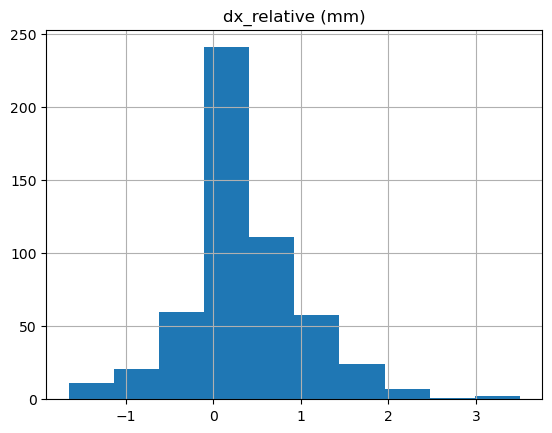

In [22]:
df.hist(column = "dx_relative (mm)")
df["dx_relative (mm)"].describe()

count    536.000000
mean       0.521567
std        1.116410
min       -3.550000
25%        0.000000
50%        0.170000
75%        1.222500
max        3.870000
Name: dy_relative (mm), dtype: float64

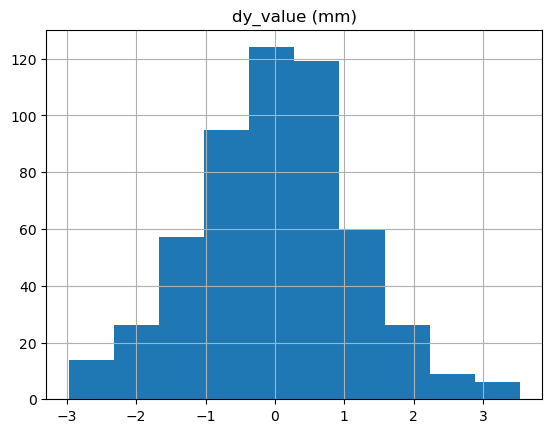

In [25]:
df.hist(column = "dy_value (mm)")
df["dy_relative (mm)"].describe()

count    536.000000
mean       0.521567
std        1.116410
min       -3.550000
25%        0.000000
50%        0.170000
75%        1.222500
max        3.870000
Name: dy_relative (mm), dtype: float64

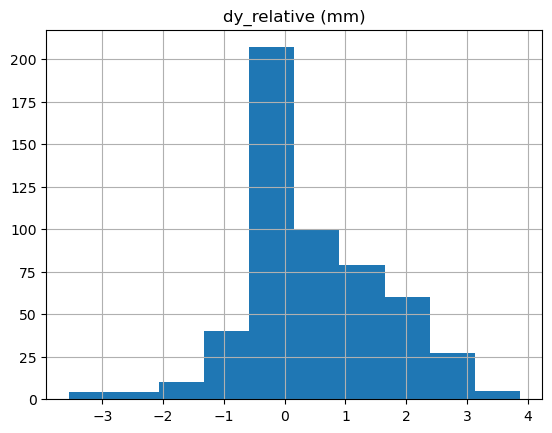

In [23]:
df.hist(column = "dy_relative (mm)")
df["dy_relative (mm)"].describe()

count    536.000000
mean      -0.641082
std        0.945193
min       -3.260000
25%       -1.350000
50%       -0.475000
75%        0.000000
max        3.730000
Name: dz_relative (mm), dtype: float64

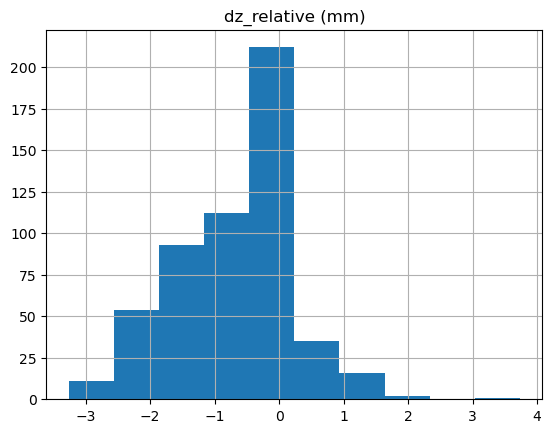

In [24]:
df.hist(column = "dz_relative (mm)")
df["dz_relative (mm)"].describe()